In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import sys
sys.path.append('../modules/')
from utils import *

plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
files = glob.glob1('.', '*.pkl')
files

[]

In [3]:
file = files[-2]
file

'results_before_peak_ita_2000000.pkl'

In [7]:
%time

samples = get_data(file)

Wall time: 0 ns


In [80]:
def plot_fit(param):
    for i in range(samples['nchains']):
        par = samples[param][0, :, i]
        y, x, _ = plt.hist(par, bins='auto', density=True)
        init_vals = [1, 0, 1]  # for [amp, cen, wid]
        popt, covar = curve_fit(gaussian, x[:-1], y, p0=init_vals)

        vars = ['amp', 'cen', 'wid']
        labels = [f'{var}={(opt):.2e}' for opt, var in zip(popt, vars)]
        #labels = map(float, labels)
        #labels = list(labels)

        plt.plot(x, gaussian(x, *popt), label=f'{*labels,}')
        plt.title(f'Gaussian fit for $\{param}$')
        plt.legend()
        plt.show()

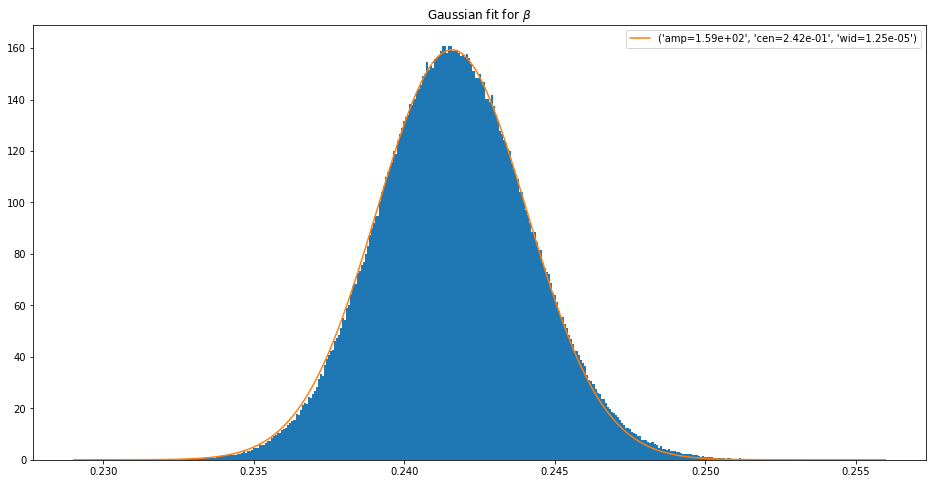

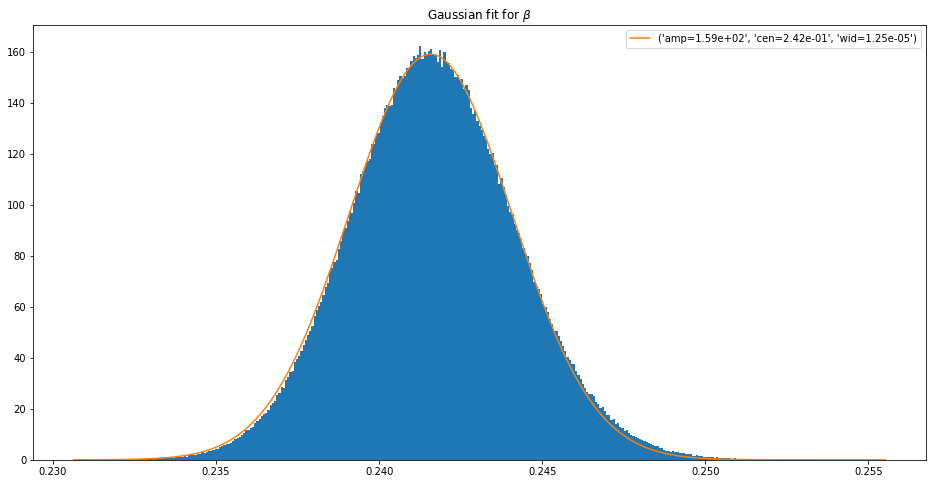

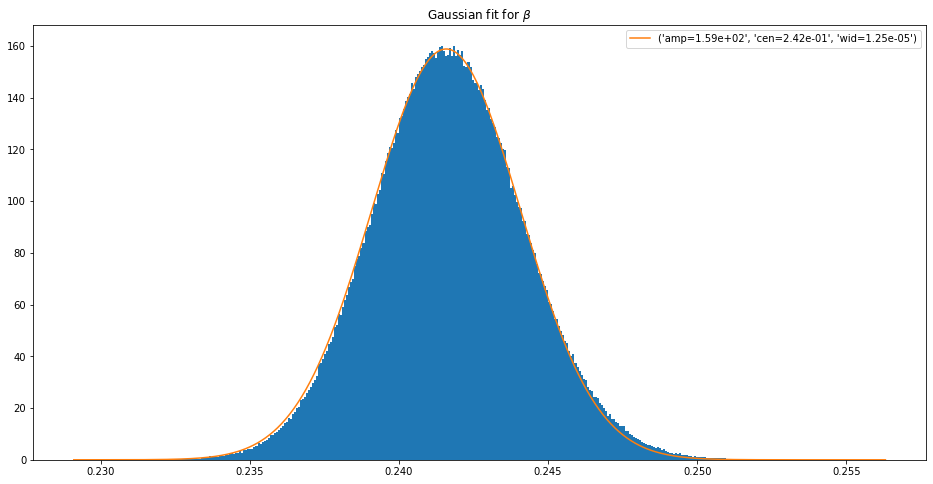

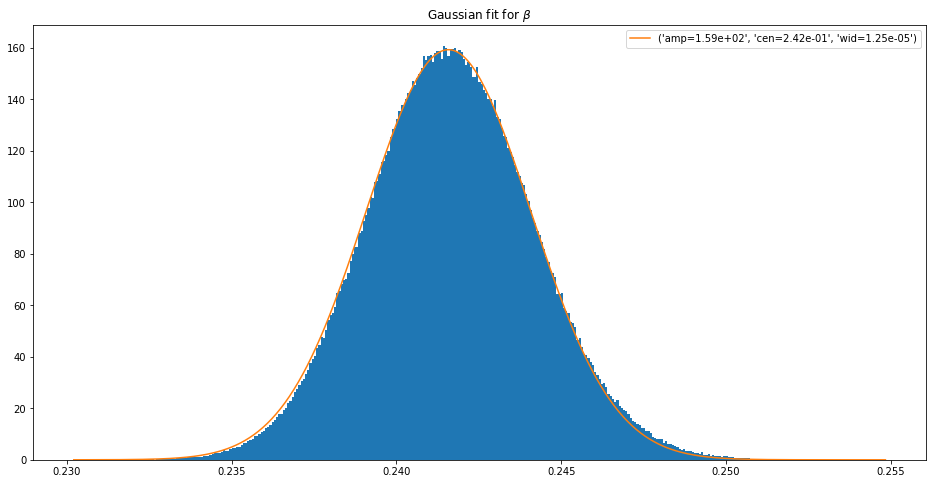

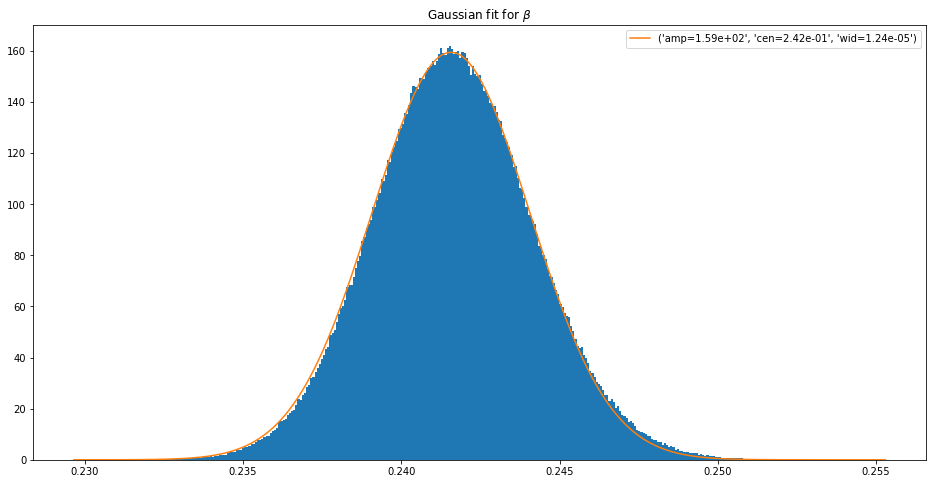

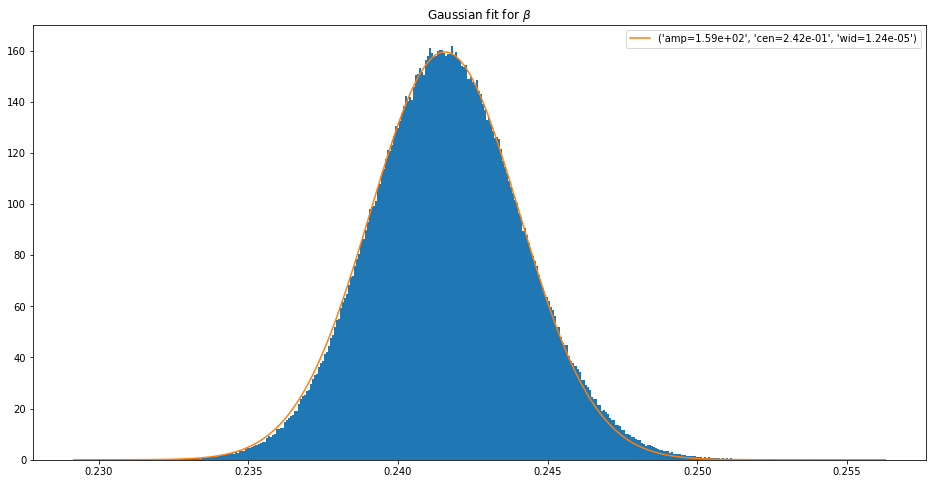

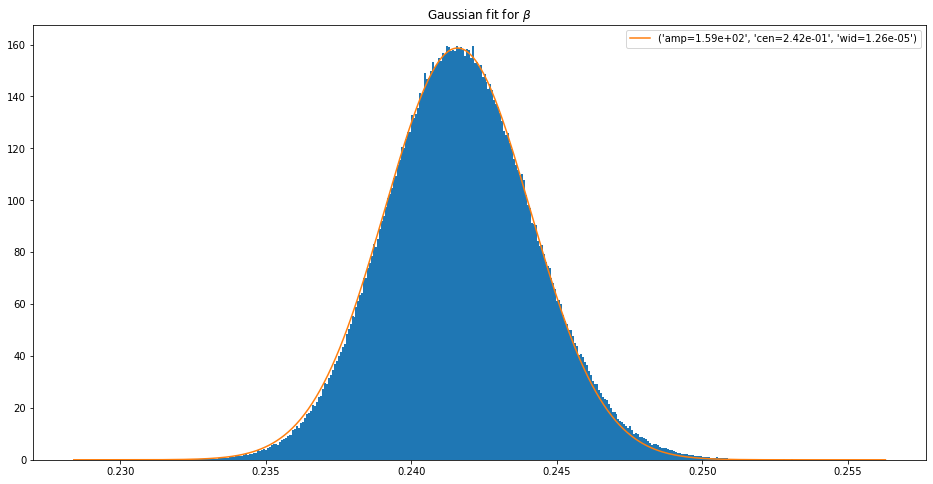

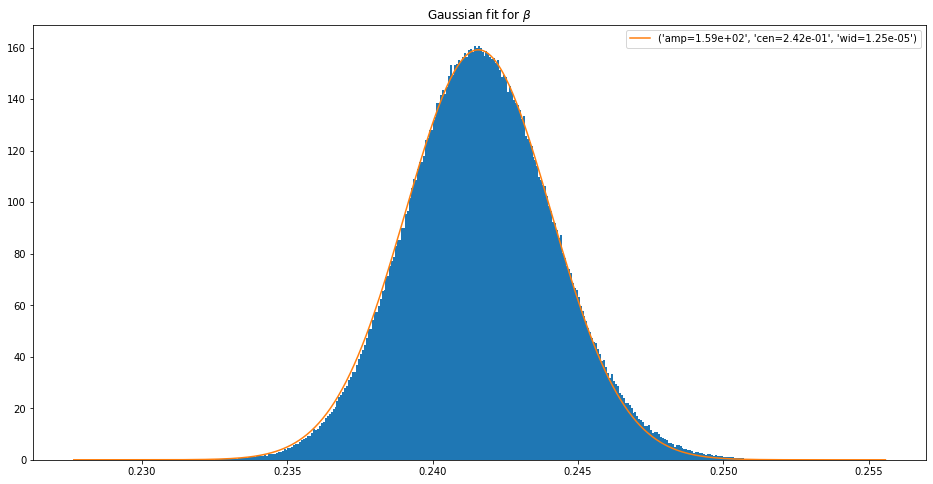

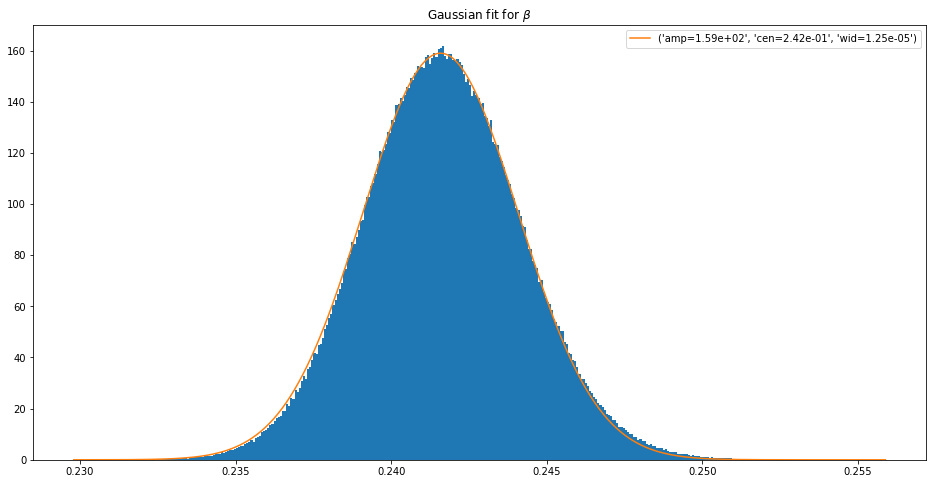

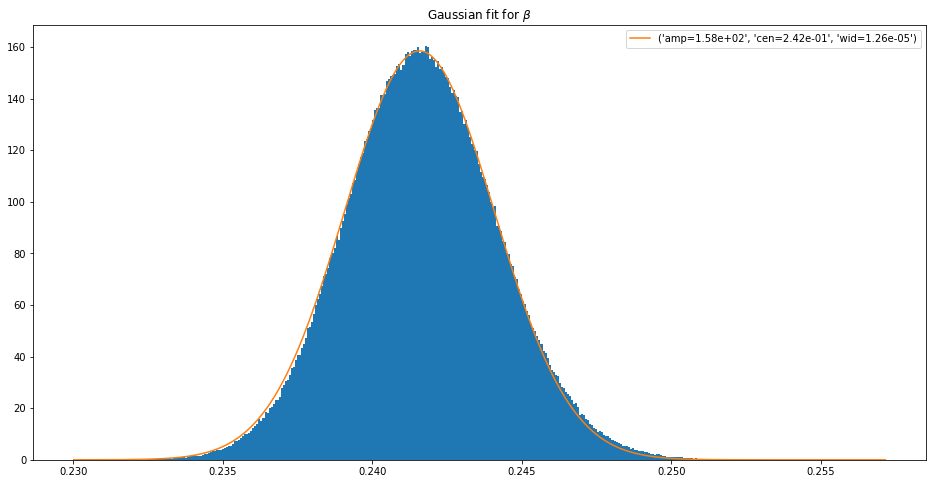

In [81]:
plot_fit('beta')

In [91]:
plot_fit('tauI')

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


ValueError: 
\tauI
^
Unknown symbol: \tauI, found '\'  (at char 0), (line:1, col:1)

<Figure size 1152x576 with 1 Axes>

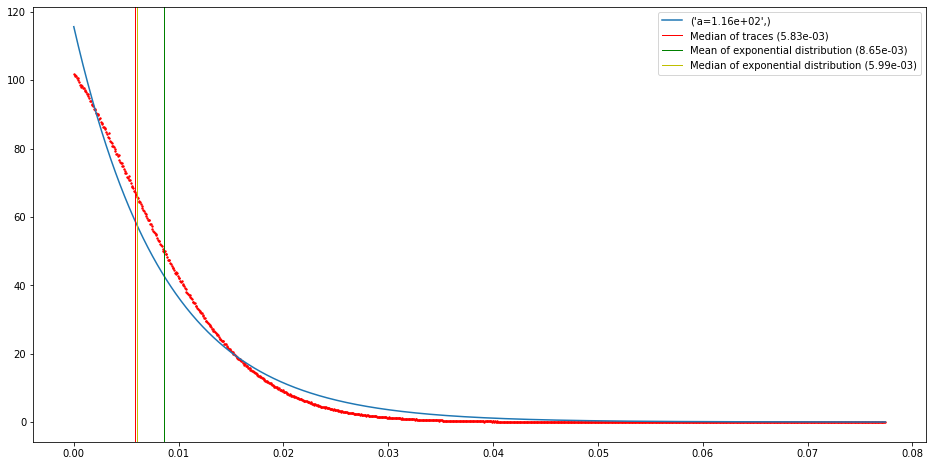

In [127]:
p = (samples['p'][0, :, 0])
p = samples['p'].ravel()
y, x, _ = plt.hist(p, bins='auto', density=True)
plt.clf()
plt.close()


init_vals = [1]  # for [amp, cen, wid]
popt, covar = curve_fit(exponential, x[:-1], y, p0=init_vals)

vars = ['a', 'b', 'c']
labels = [f'{var}={(opt):.2e}' for opt, var in zip(popt, vars)]
#labels = map(float, labels)
#labels = list(labels)

plt.scatter(x[:-1], y, s=2, color='r')
plt.plot(x, exponential(x, *popt), label=f'{*labels,}')
ax = plt.gca()
ax.axvline(np.median(p), color='r', 
                 lw=1, label=f'Median of traces ({np.median(p):.2e})')
ax.axvline(1. / (popt), color='g', 
                 lw=1, label=f'Mean of exponential distribution ({(1. / (popt))[0]:.2e})')
ax.axvline(np.log(2) / (popt), color='y', 
                 lw=1, label=f'Median of exponential distribution ({(np.log(2) / (popt))[0]:.2e})')
# plt.title(f'p = {(1. / (popt))[0]:.2e} $\pm$ {(1. / (popt) ** 2)[0]:.2e}')
plt.legend()

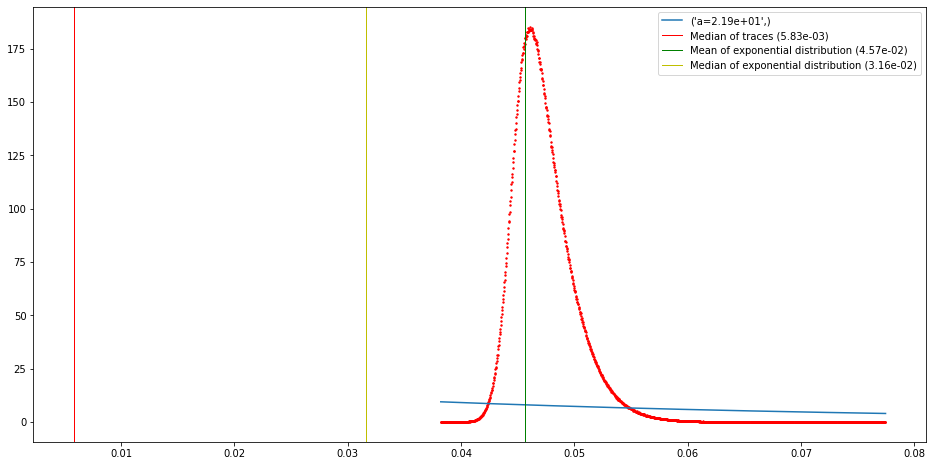

In [128]:
q = (samples['q'][0, :, 0])
q = samples['q'].ravel()
y, x, _ = plt.hist(q, bins='auto', density=True)
plt.clf()
plt.close()


init_vals = [1]  # for [amp, cen, wid]
popt, covar = curve_fit(exponential, x[:-1], y, p0=init_vals)

vars = ['a', 'b', 'c']
labels = [f'{var}={(opt):.2e}' for opt, var in zip(popt, vars)]

plt.scatter(x[:-1], y, s=2, color='r')
plt.plot(x, exponential(x, *popt), label=f'{*labels,}')
ax = plt.gca()
ax.axvline(np.median(p), color='r', 
                 lw=1, label=f'Median of traces ({np.median(p):.2e})')
ax.axvline(1. / (popt), color='g', 
                 lw=1, label=f'Mean of exponential distribution ({(1. / (popt))[0]:.2e})')
ax.axvline(np.log(2) / (popt), color='y', 
                 lw=1, label=f'Median of exponential distribution ({(np.log(2) / (popt))[0]:.2e})')
# plt.title(f'p = {(1. / (popt))[0]:.2e} $\pm$ {(1. / (popt) ** 2)[0]:.2e}')
plt.legend()

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

#mpl.style.use("ggplot")

def danoes_formula(data):
    """
    DANOE'S FORMULA
    https://en.wikipedia.org/wiki/Histogram#Doane's_formula
    """
    N = len(data)
    skewness = st.skew(data)
    sigma_g1 = math.sqrt((6*(N-2))/((N+1)*(N+3)))
    num_bins = 1 + math.log(N,2) + math.log(1+abs(skewness)/sigma_g1,2)
    num_bins = round(num_bins)
    return num_bins

def plot_histogram(data, results, n):
    ## n first distribution of the ranking
    N_DISTRIBUTIONS = {k: results[k] for k in list(results)[:n]}

    ## Histogram of data
    plt.figure(figsize=(10, 5))
    plt.hist(data, density=True, ec='white', color=(63/235, 149/235, 170/235))
    plt.title('HISTOGRAM')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')

    ## Plot n distributions
    for distribution, result in N_DISTRIBUTIONS.items():
        # print(i, distribution)
        sse = result[0]
        arg = result[1]
        loc = result[2]
        scale = result[3]
        x_plot = np.linspace(min(data), max(data), 1000)
        y_plot = distribution.pdf(x_plot, loc=loc, scale=scale, *arg)
        # distribution -> <scipy.stats._continuous_distns.alpha_gen object at 0x7ffb5ab8cbb0>
        # alpha_gen object at 0x7ffb5ab8cbb0>
        distr_name = (str(distribution)).split('.')[-1]
        # alpha_gen
        distr_name = distr_name.split(' ')[0] 
        plt.plot(x_plot, y_plot, label=f'{distr_name}: {sse:.2e}', 
                 color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
    
    plt.legend(title='DISTRIBUTIONS', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def fit_data(data):
    ## st.frechet_r,st.frechet_l: are disbled in current SciPy version
    ## st.levy_stable: a lot of time of estimation parameters
    ALL_DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm, st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
    MY_DISTRIBUTIONS = [st.norm, st.gamma, st.truncnorm, st.expon]

    ## Calculae Histogram
    num_bins = danoes_formula(data)
    frequencies, bin_edges = np.histogram(data, num_bins, density=True)
    central_values = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

    results = {}
    for distribution in MY_DISTRIBUTIONS:
        ## Get parameters of distribution
        params = distribution.fit(data)
        
        ## Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
    
        ## Calculate fitted PDF and error with fit in distribution
        pdf_values = [distribution.pdf(c, loc=loc, scale=scale, *arg) for c in central_values]
        
        ## Calculate SSE (sum of squared estimate of errors)
        sse = np.sum(np.power(frequencies - pdf_values, 2.0))
        
        ## Build results and sort by sse
        results[distribution] = [sse, arg, loc, scale]
        
    results = {k: results[k] for k in sorted(results, key=results.get)}
    return results
        
def main():
    ## Import data
    data = samples['p'].ravel()[:1000]
    results = fit_data(data)
    plot_histogram(data, results, 1)

"""if __name__ == "__main__":
    main()"""
    

'if __name__ == "__main__":\n    main()'

In [22]:
result = [140.5535863587671, (1.0819103065399651,), 1.2943267515478114e-05, 0.006485803912355821]


sse = result[0]
arg = result[1]
loc = result[2]
scale = result[3]


mean, var, skew, kurt = st.gamma.stats(arg[0], loc, scale, moments='mvsk')
mean, var, np.sqrt(var), skew, kurt

(array(0.00703),
 array(4.55112629e-05),
 0.006746203589542796,
 array(1.92280112),
 array(5.54574623))

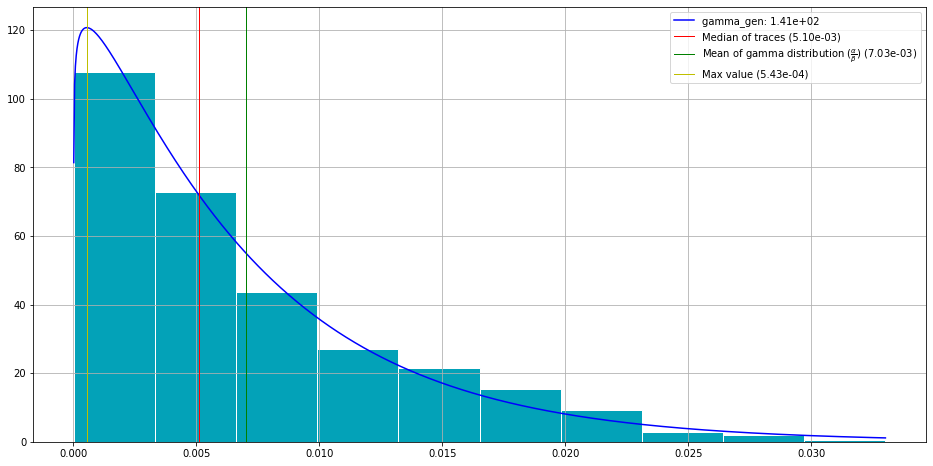

<Figure size 1152x576 with 0 Axes>

In [28]:
data = samples['p'].ravel()[:1000]

distribution = st.gamma
result = [140.5535863587671, (1.0819103065399651,), 1.2943267515478114e-05, 0.006485803912355821]
mean, var, skew, kurt = st.gamma.stats(arg[0], loc, scale, moments='mvsk')

sse = result[0]
arg = result[1]
loc = result[2]
scale = result[3]

mean, var, skew, kurt = st.gamma.stats(arg[0], loc, scale, moments='mvsk')


x_plot = np.linspace(min(data), max(data), 1000)
y_plot = distribution.pdf(x_plot, loc=loc, scale=scale, *arg)
# distribution -> <scipy.stats._continuous_distns.alpha_gen object at 0x7ffb5ab8cbb0>
# alpha_gen object at 0x7ffb5ab8cbb0>
distr_name = (str(distribution)).split('.')[-1]
# alpha_gen
distr_name = distr_name.split(' ')[0] 
plt.hist(data, density=True, ec='white', color=(3/235, 149/235, 170/235))
plt.plot(x_plot, y_plot, label=f'{distr_name}: {sse:.2e}', 
         color='b')
ax = plt.gca()
ax.axvline(np.median(data), color='r', 
           lw=1, label=f'Median of traces ({np.median(data):.2e})')
ax.axvline(mean, color='g',
           lw=1, label=fr'Mean of gamma distribution ($\frac{{\alpha}}{{\beta}}$) ({mean:.2e})')
ax.axvline(x_plot[np.argmax(y_plot)], color='y', 
           lw=1, label=f'Max value ({x_plot[np.argmax(y_plot)]:.2e})')
ax.grid()
plt.legend()


#plt.savefig('prova.png', dpi=400)
plt.show()

plt.clf()